<a href="https://colab.research.google.com/github/Gtushar1408/Creadit_Card_Transaction_Analysis/blob/main/DATA_SCIENCE_ASSIGNMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#● Part 1 - Feature extraction from battery data

Import data:-

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
d = pd.read_csv("Part1(1).csv", index_col=[0])

In [3]:
d

,timestamp,soc,voltage,current
0,2021-12-12 04:41:20,87,56.3,0.0
1,2021-12-12 04:41:20,87,56.3,0.0
2,2021-12-12 04:41:20,87,56.3,0.0
3,2021-12-12 04:43:31,87,56.3,0.0
4,2021-12-12 04:43:31,87,56.3,0.0
...,...,...,...,...
81135,2021-11-30 04:54:47,95,57.9,0.0
81136,2021-11-30 04:54:47,95,57.8,0.0
81137,2021-11-30 04:56:58,95,57.8,0.0
81138,2021-11-30 04:59:09,95,57.8,0.0


convert in datetime:-

In [4]:
d['timestamp'] = pd.to_datetime(d['timestamp'])


Drop duplicates:-

In [5]:
d.drop_duplicates(subset=['timestamp'], inplace=True)


Sort Values:-

In [6]:
d = d.sort_values('timestamp')


visualize the soc, voltage , current:-

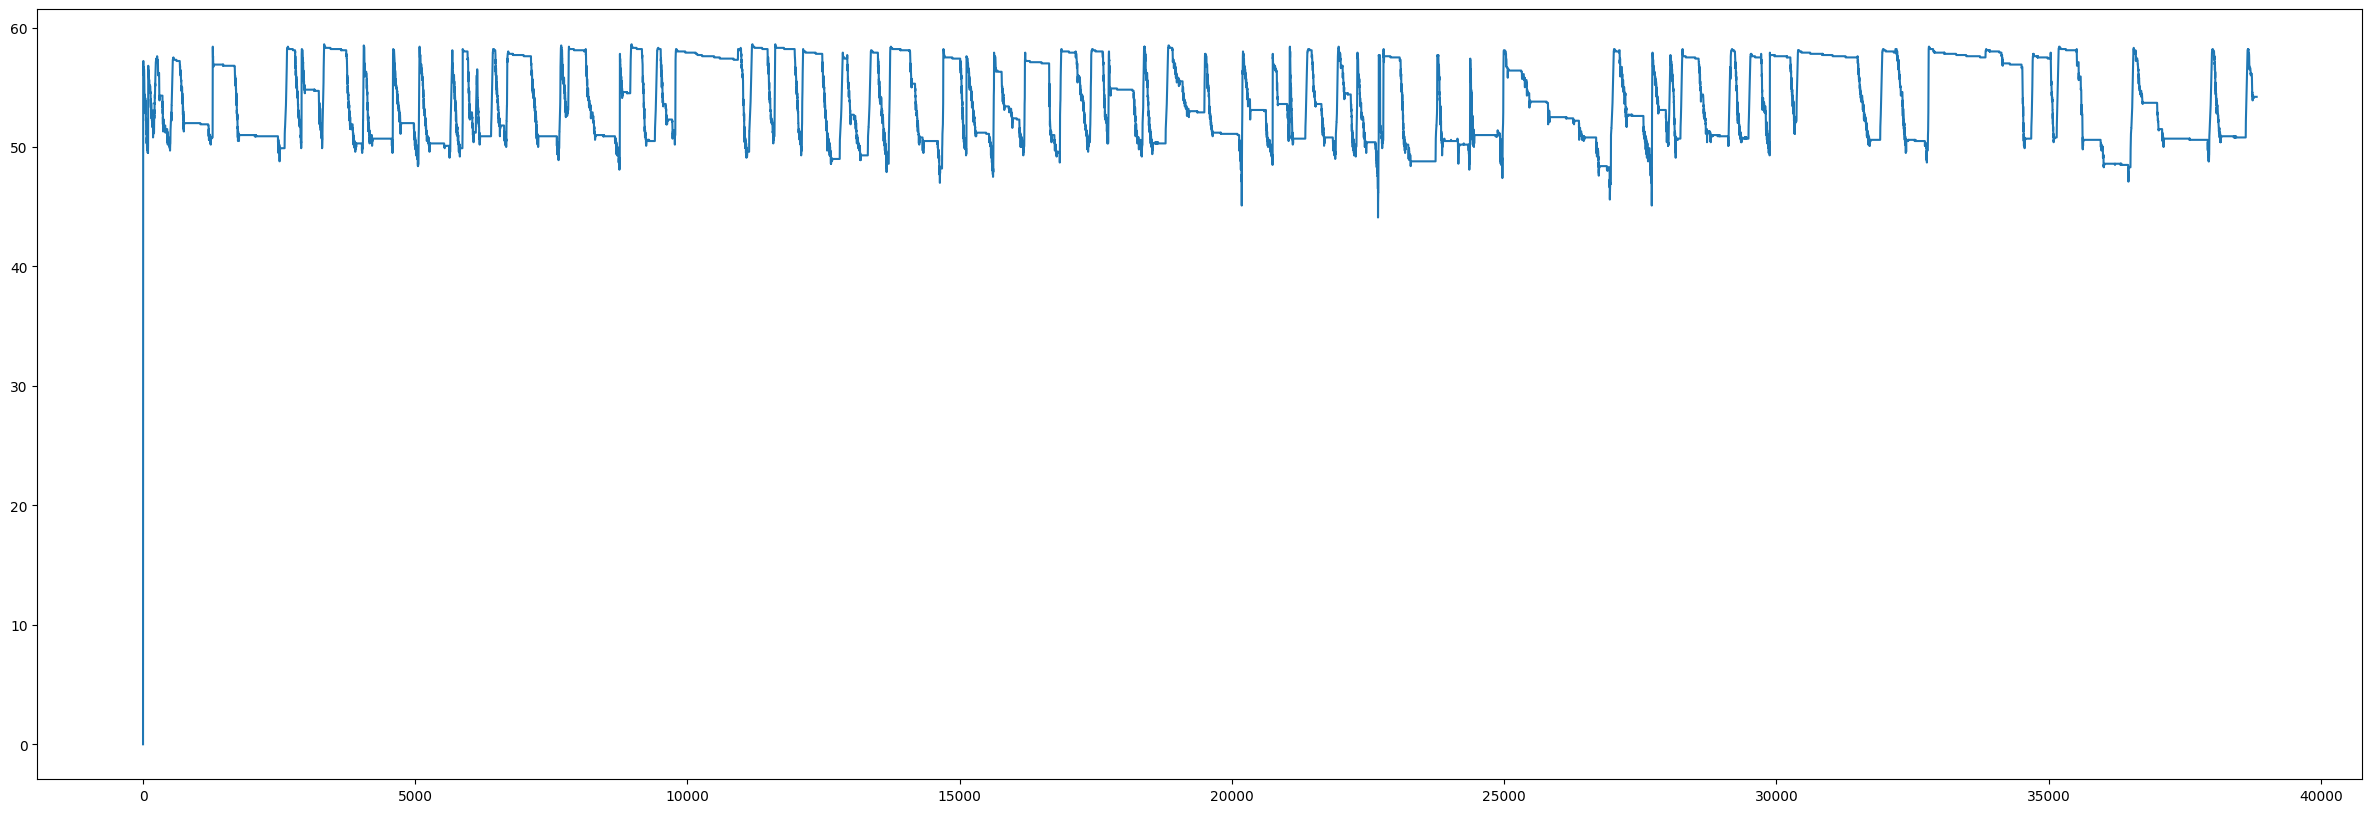

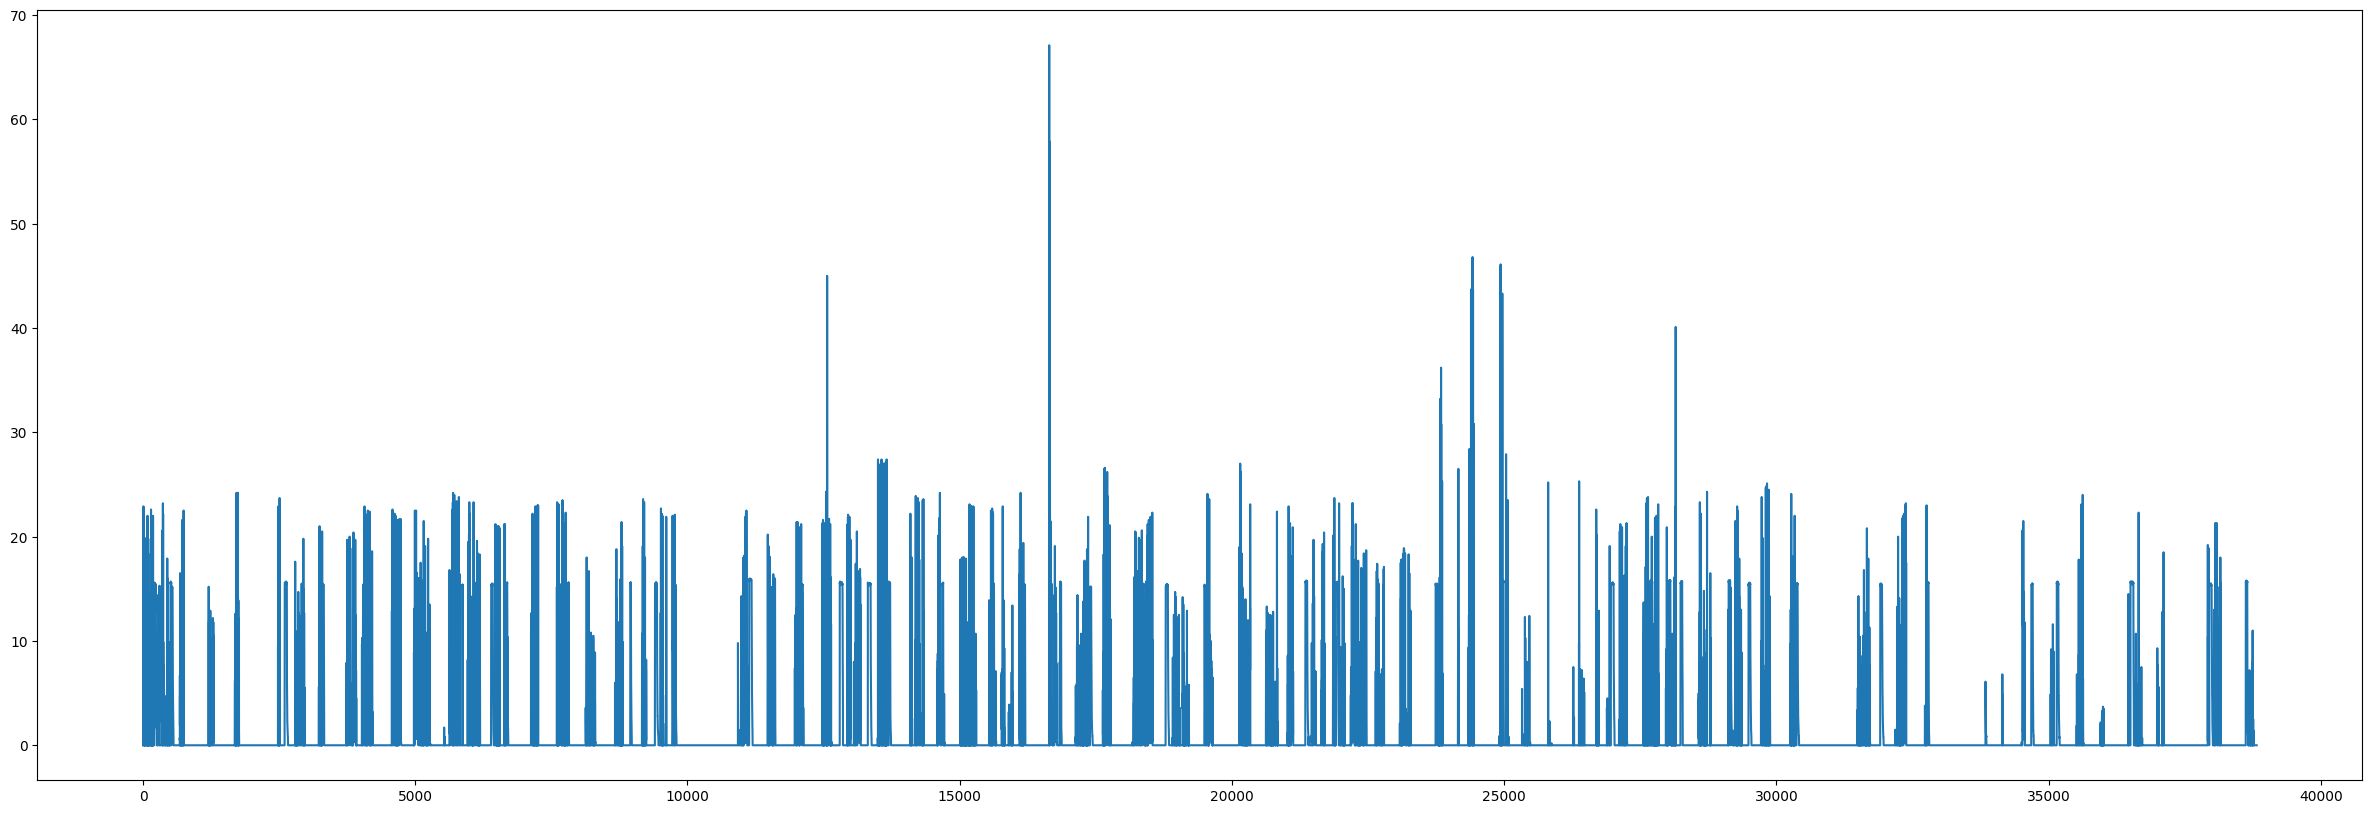

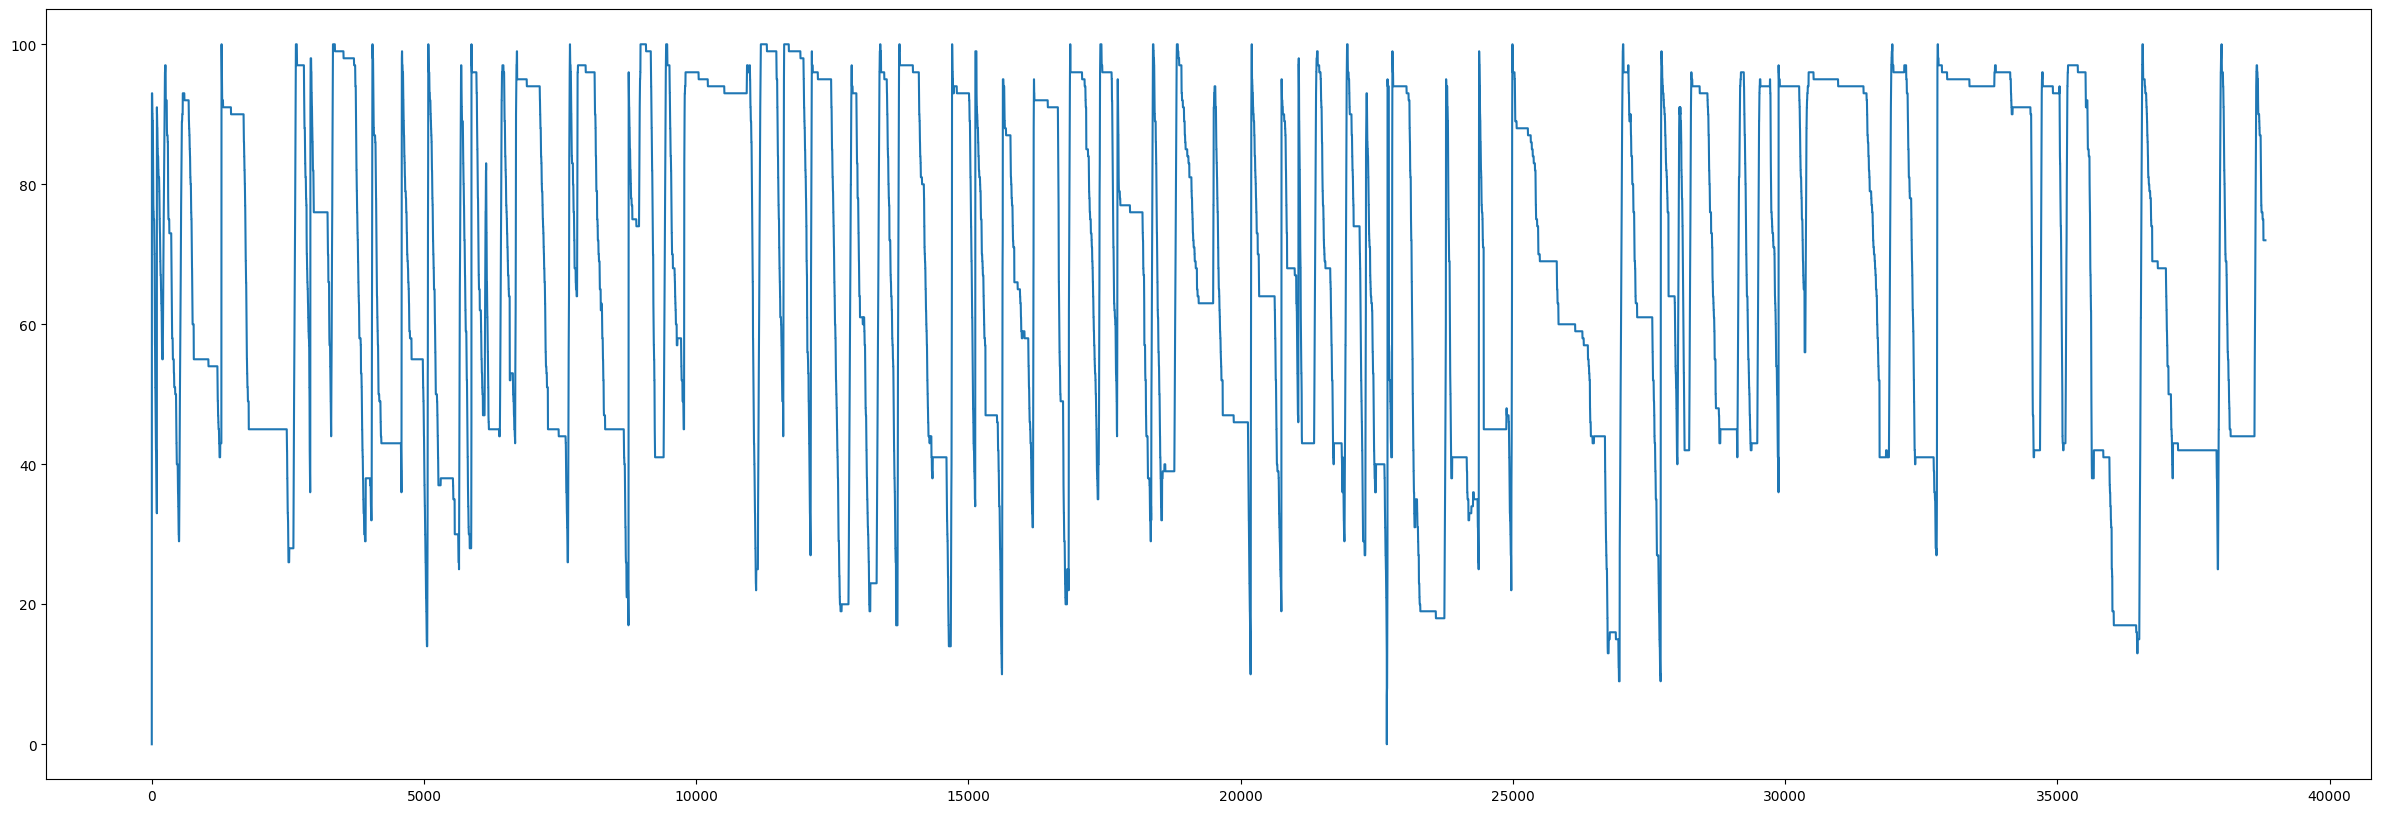

In [8]:
v = d['voltage'].tolist()
plt.figure(figsize=(30, 10))
plt.plot(v)
plt.show()

i = d['current'].tolist()
plt.figure(figsize=(30, 10))
plt.plot(i)
plt.show()

socs = d['soc'].tolist()
plt.figure(figsize=(30, 10))
plt.plot(socs)
plt.show()

Drop overflow values or data:-

In [9]:
d = d[d['current'] < 30]
d = d.iloc[1:]

Task 1: Data Preprocessing


In [10]:
socs = d['soc'].tolist()


Task 2: Feature Extraction of FECs


In [11]:
charged = []
discharged = []
charging_indexes = []
discharging_indexes = []

for a_value in range(len(socs)):
    if a_value + 1 in range(len(socs)):
        if socs[a_value] < socs[a_value+1]:
            charged.append((socs[a_value+1] - socs[a_value]) / 100)
            charging_indexes.append(a_value)
        if socs[a_value] > socs[a_value+1]:
            discharged.append((socs[a_value] - socs[a_value+1]) / 100)
            discharging_indexes.append(a_value)

c = []

for a in range(len(socs)):
    if a in charging_indexes:
        c.append('charging')
    elif a in discharging_indexes:
        c.append('discharging')
    else:
        c.append(None)

for stat in range(1, len(c) - 1):
    if c[stat] == None:
        if c[stat - 1] == 'charging' and c[stat + 1] == None:
            c[stat] = 'charging'
        elif c[stat - 1] == 'charging' and c[stat + 1] == 'discharging':
            c[stat] = 'charging'
        elif c[stat - 1] == 'discharging' and c[stat + 1] == 'discharging':
            c[stat] = 'discharging'
        elif c[stat - 1] == 'discharging' and c[stat + 1] == None:
            c[stat] = 'discharging'
        elif c[stat - 1] == 'discharging' and c[stat + 1] == 'charging':
            c[stat] = 'discharging'
        elif c[stat - 1] == 'charging' and c[stat + 1] == 'charging':
            c[stat] = 'charging'

d['status'] = c

Plot the results

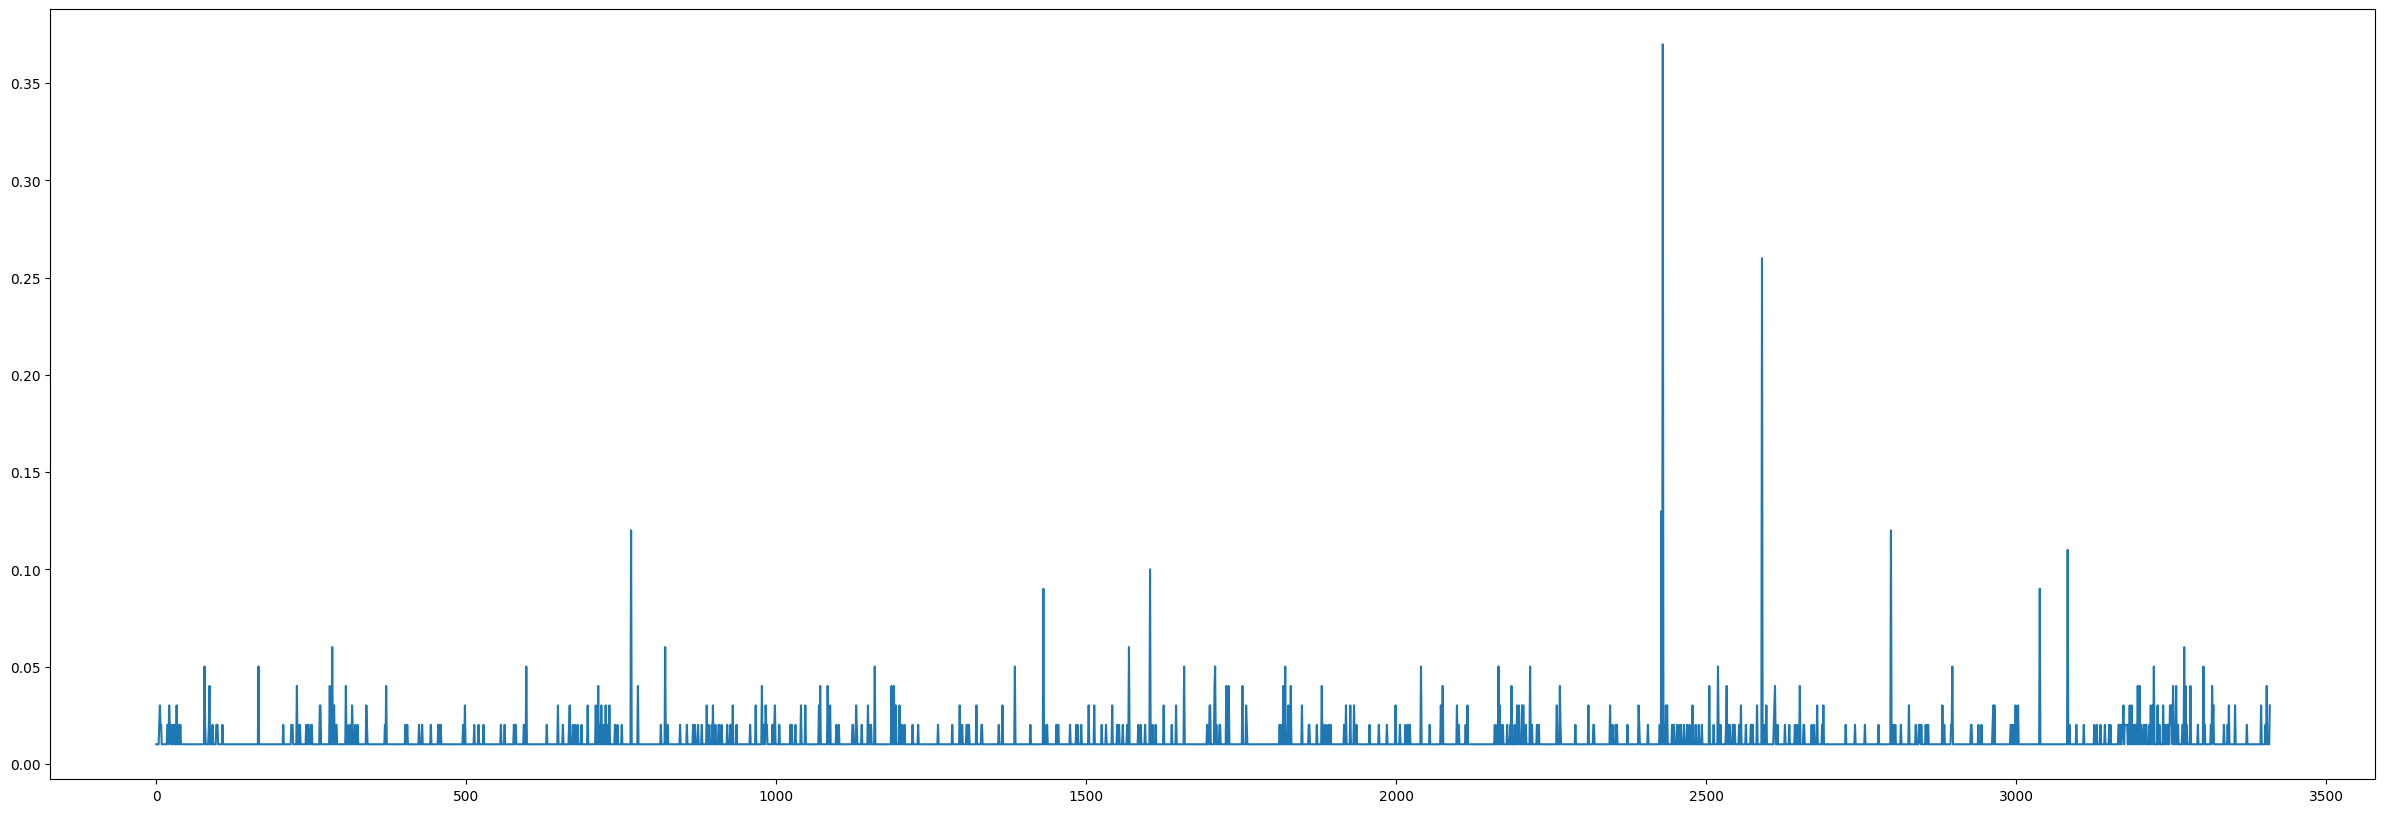

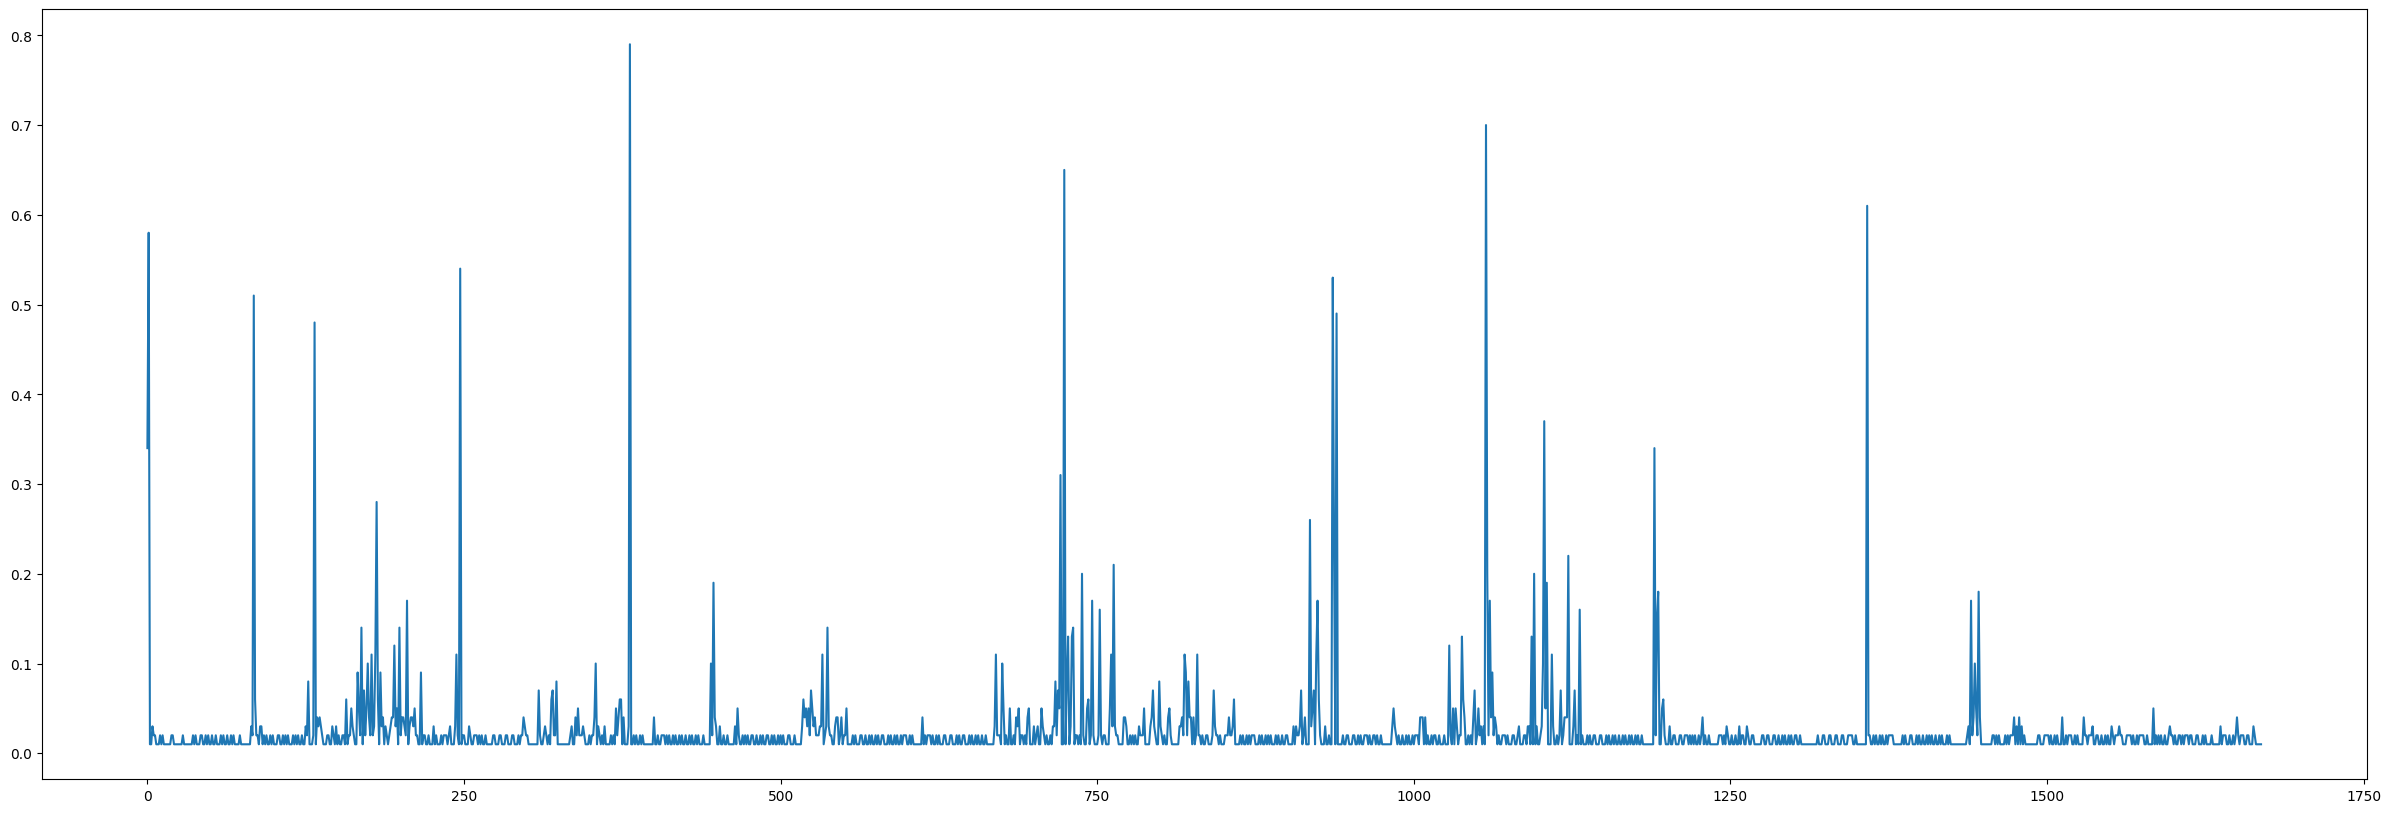

In [13]:
plt.figure(figsize=(30, 10))
plt.plot(discharged)
plt.show()

plt.figure(figsize=(30, 10))
plt.plot(charged)
plt.show()

Task 3: Calculate Battery Capacity


In [12]:
capacity = 0
cycles = 0

for idx, status in enumerate(c):
    if status == 'charging':
        if idx < len(charged):
            capacity += charged[idx]
            cycles += 1

if cycles >= 10:
    avg_capacity = capacity / cycles
    print("Average Battery Capacity over the first ten cycles:", avg_capacity)

Average Battery Capacity over the first ten cycles: 0.02917582417582403


#● Part 2 - Modelling the SOH(State Of Health) of a cell


importing data:-

In [25]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [26]:
data = pd.read_excel(r"Part2.csv.xlsx")


In [27]:
data

,Cycle_Index,Discharge_Capacity (Ah)
0,3,1.050
1,4,2.082
2,5,1.041
3,6,1.041
4,7,1.041
...,...,...
3647,4054,0.798
3648,4055,0.797
3649,4056,0.797
3650,4057,0.797


Data visulation:-

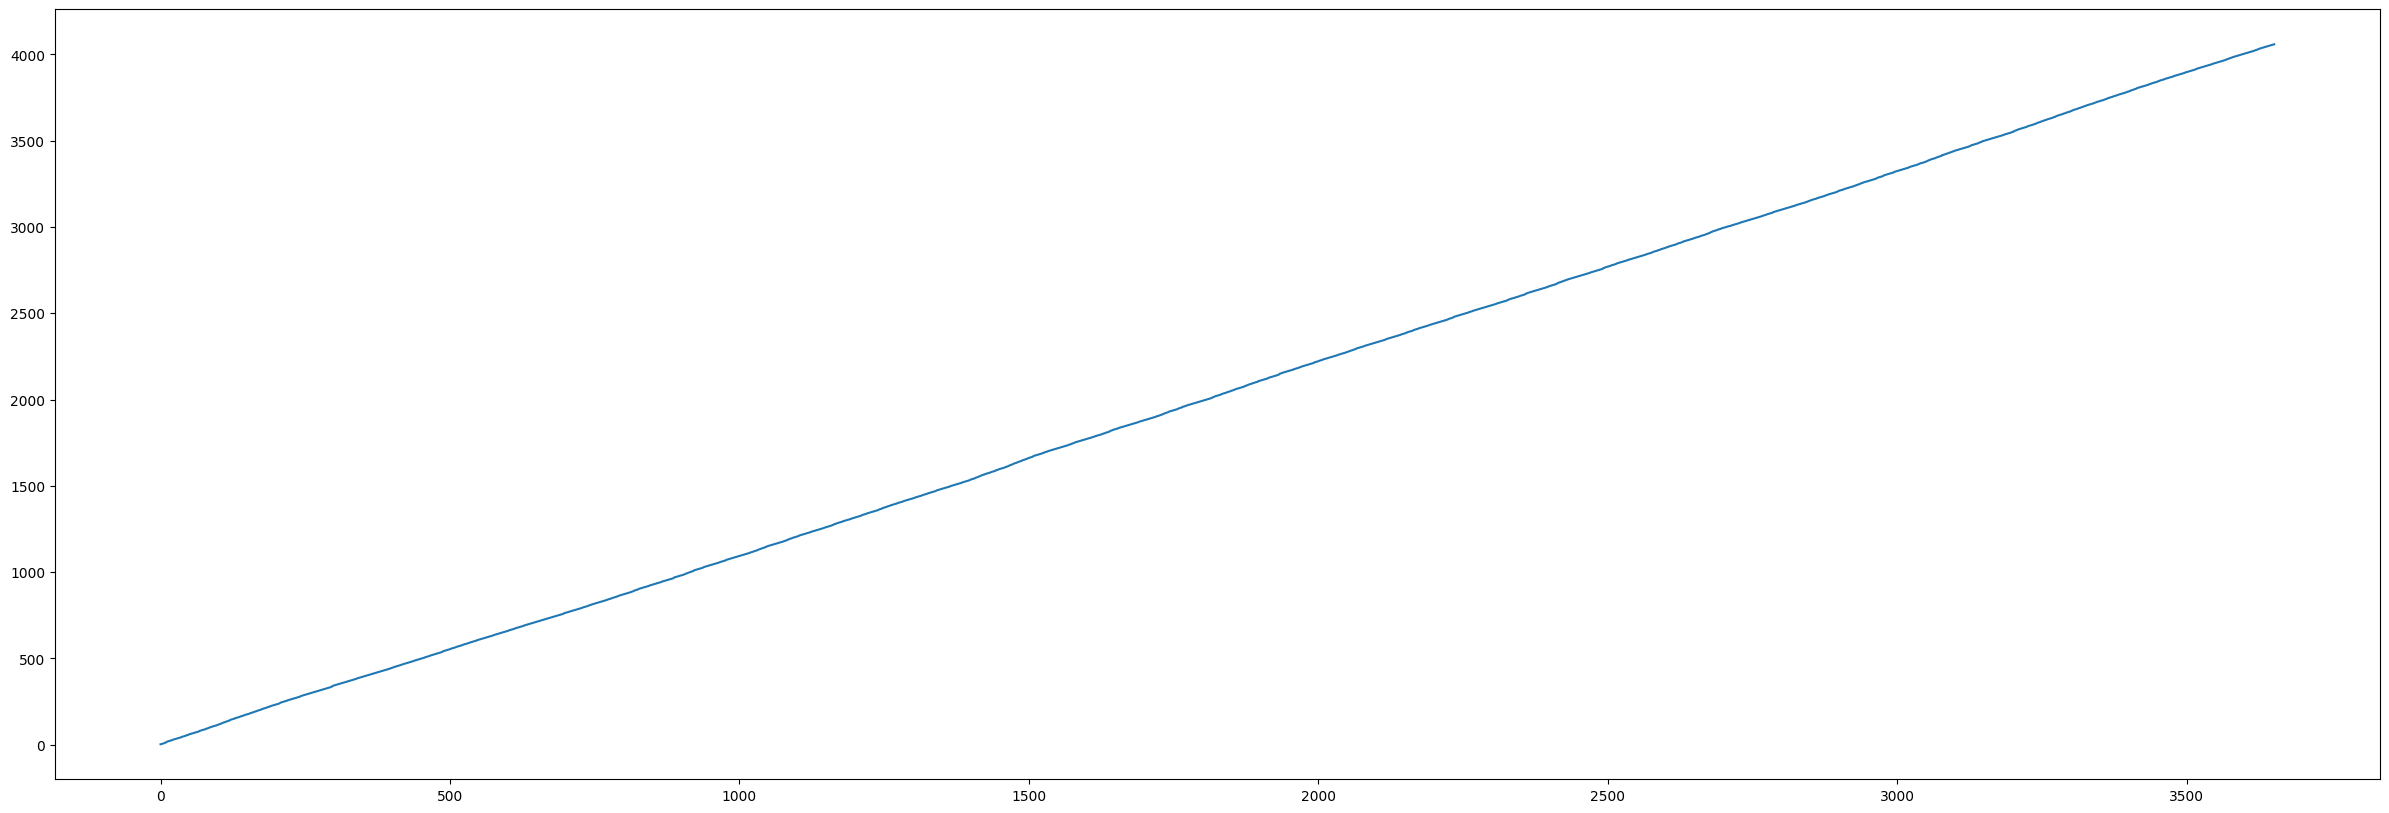

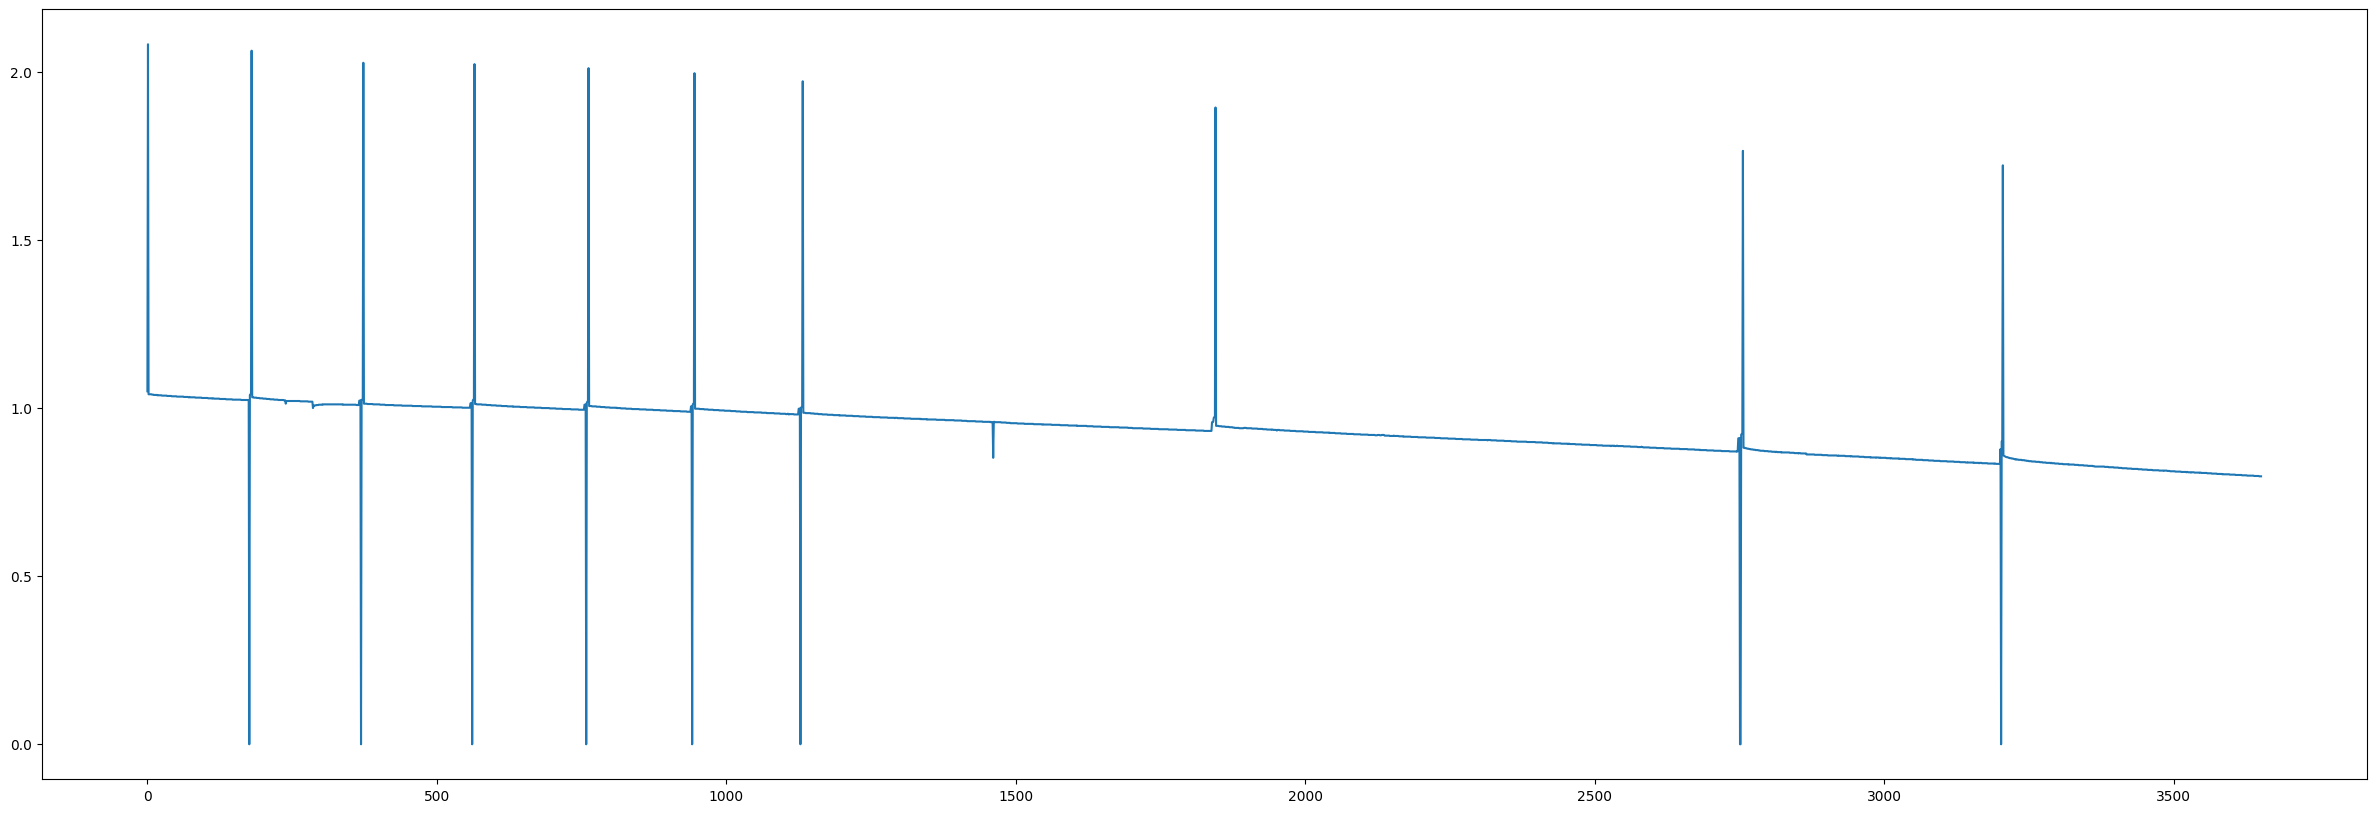

In [28]:
from matplotlib._api import define_aliases
C_I = data['Cycle_Index'].tolist()
plt.figure(figsize=(30, 10))
plt.plot(C_I)
plt.show()

D_A = data['Discharge_Capacity (Ah)'].tolist()
plt.figure(figsize=(30, 10))
plt.plot(D_A)
plt.show()


Task 1: Model the SOH of the cell as a function of cycle number


In [29]:
def Predict_SOH(dataframe):
    initial_capacity = dataframe['Discharge_Capacity (Ah)'].iloc[0]
    dataframe['SOH'] = dataframe['Discharge_Capacity (Ah)'] / initial_capacity
    return dataframe['SOH'].values

Task 2: Using the model, determine the RUL of the battery at specific cycle counts and plot


In [30]:
cycle_counts = [500, 1000, 2000, 3000, 3500]
actual_values = [0.8] * len(cycle_counts)

In [31]:
def plot_predicted_vs_actual(dataframe, cycle_counts, actual_values):
    predicted_soh = Predict_SOH(dataframe)
    plt.figure(figsize=(10, 6))
    plt.plot(dataframe['Cycle_Index'], predicted_soh, label='Predicted SOH')
    plt.scatter(cycle_counts, actual_values, color='red', marker='x', label='Actual Values')
    plt.xlabel('Cycle Index')
    plt.ylabel('SOH')
    plt.title('Predicted vs. Actual SOH')
    plt.legend()
    plt.show()

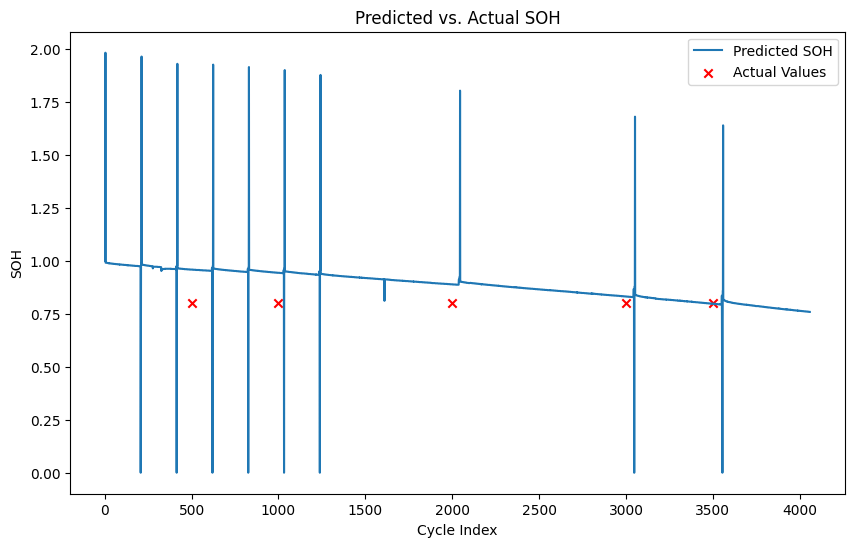

In [32]:
plot_predicted_vs_actual(data, cycle_counts, actual_values)


Task 3: Write a function to evaluate the performance of the model


In [33]:
def Estimate_error(dataframe):
    predicted_soh = Predict_SOH(dataframe)
    actual_soh = dataframe['Discharge_Capacity (Ah)'] / dataframe['Discharge_Capacity (Ah)'].iloc[0]
    rmse = np.sqrt(mean_squared_error(actual_soh, predicted_soh))
    mae = mean_absolute_error(actual_soh, predicted_soh)
    return rmse, mae

# Example of how to use Estimate_error function
rmse, mae = Estimate_error(data)
print("RMSE:", rmse)
print("MAE:", mae)

RMSE: 0.0
MAE: 0.0
